# Purpose

Show 3D line plot of cubic spline using plotly. Try out Express and Extended APIs. Find that only the latter allows setting the camera position and angle.

# Imports

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px

# Code

In [2]:
def p(t, c0, c1, c2, c3):
    t0 = (1 - t)**3
    t1 = 3 * t * (1 - t)**2
    t2 = 3 * (t**2) * (1 - t)
    t3 = t**3
    # print(t0, t1, t2, t3)
    return t0*c0 + t1*c1 + t2*c2 + t3*c3

def dp(t, c0, c1, c2, c3):
    a0 = -3 * c0 * (1 - t)**2
    a1 = 3 * c1 * (t * (2*t - 2) + (1 - t)**2)
    a2 = 3 * c2 * (-1 * t**2 + 2 * t * (1 - t))
    a3 = 3 * c3 * t**2
    return a0 + a1 + a2 + a3

def show_head_and_tail(df, nrows=5):
    """See https://www.askpython.com/python-modules/pandas/head-and-tail-of-dataframe-series
    """
    with pd.option_context('display.max_rows', 2 * nrows):
        print(df)

# Set up case

In [8]:
k = 3
b = 2
d0_multiplier = 5
d1_multiplier = 5
p0 = np.array([0, 0, 0])
p1 = np.array([k, b, 1.5])
d0 = d0_multiplier * np.array([1, 0, 0])
d1 = d1_multiplier * np.array([1, 0, 0])

c0 = p0
c1 = p0 + d0 / 3.
c2 = p1 - d1 / 3.
c3 = p1

tt = np.linspace(0, 1, 101)
pt = np.array([p(t, c0, c1, c2, c3) for t in tt])

# dp(0.5, c0, c1, c2, c3)

df = pd.DataFrame(np.array([tt, pt[:, 0], pt[:, 1], pt[:, 2]]).T, columns=['t', 'x', 'y', 'z'])

show_head_and_tail(df)

        t         x         y         z
0    0.00  0.000000  0.000000  0.000000
1    0.01  0.049404  0.000596  0.000447
2    0.02  0.097632  0.002368  0.001776
3    0.03  0.144708  0.005292  0.003969
4    0.04  0.190656  0.009344  0.007008
..    ...       ...       ...       ...
96   0.96  2.809344  1.990656  1.492992
97   0.97  2.855292  1.994708  1.496031
98   0.98  2.902368  1.997632  1.498224
99   0.99  2.950596  1.999404  1.499553
100  1.00  3.000000  2.000000  1.500000

[101 rows x 4 columns]


# 3D plot with express API

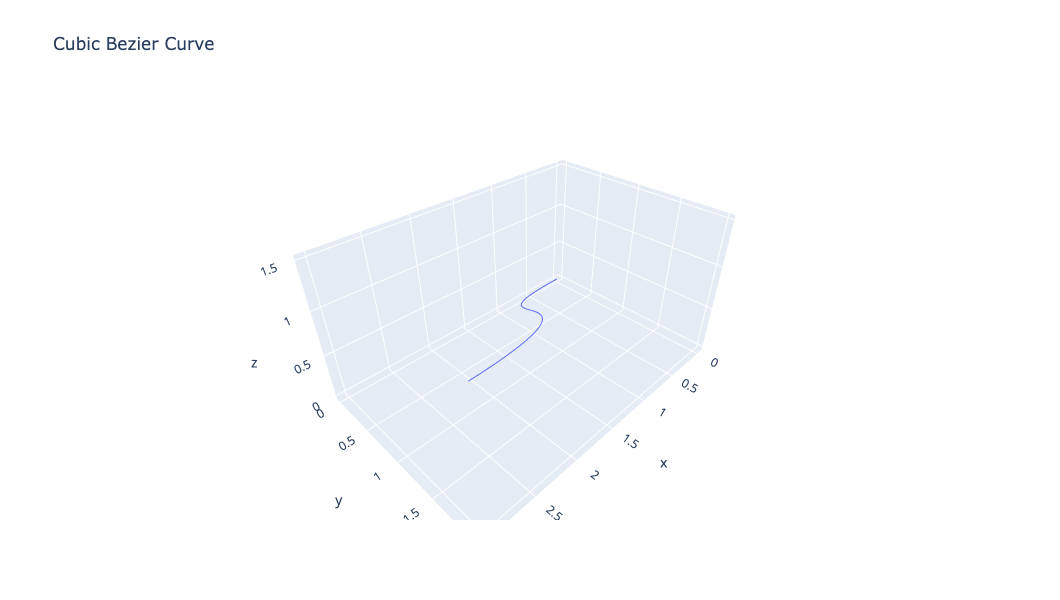

In [9]:
fig = px.line_3d(df, x="x", y="y", z="z", width=700, height=600, title='Cubic Bezier Curve')
fig.show()

# 3D plot with extended API

In [10]:
import plotly.graph_objects as go

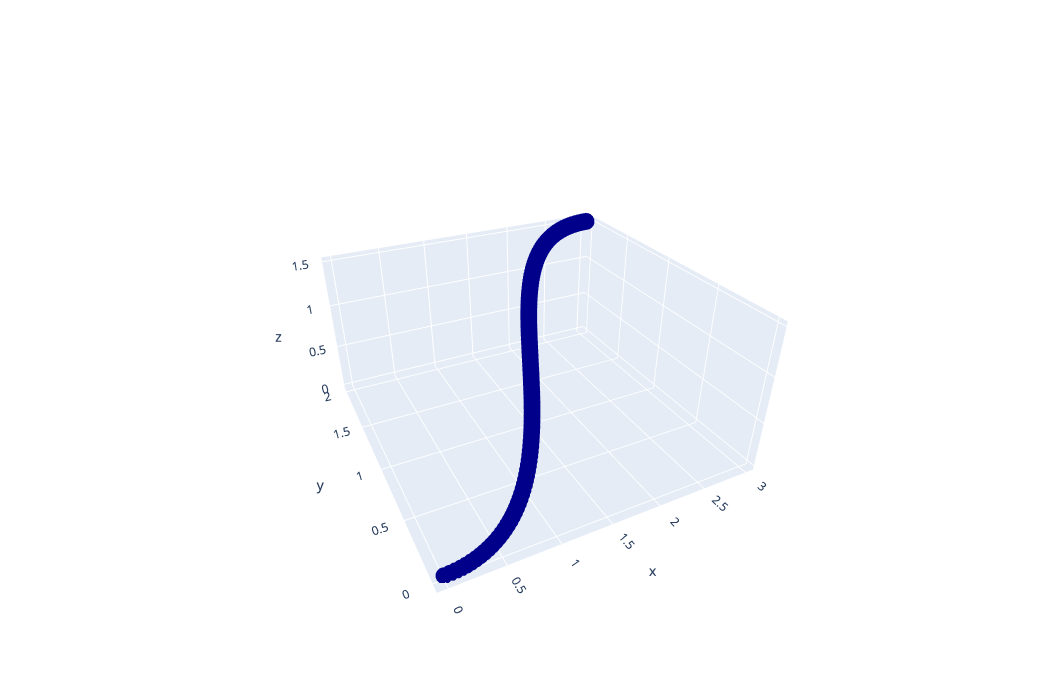

In [18]:
fig_ext = go.Figure(data=go.Scatter3d(
    x=df["x"], y=df["y"], z=df["z"],
    marker=dict(
        size=10,
    ),
    line=dict(
        color='darkblue',
        width=3
    )
))

fig_ext.update_layout(
    width=800,
    height=700,
    autosize=False,
    scene=dict(
        camera=dict(
            up=dict(
                x=0,
                y=0,
                z=1
            ),
            eye=dict(
                x=-0.75,
                y=-1.5,
                z=1,
            )
        ),
        aspectratio = dict( x=1, y=1, z=0.5 ),
        aspectmode = 'manual'
    ),
)

fig_ext.show()


In [38]:
fig_ext2 = go.Figure(data=go.Scatter3d(
    x=df["x"], y=df["y"], z=df["z"],
    marker=dict(
        size=10,
    ),
    line=dict(
        color='darkblue',
        width=3
    )
))

fig_ext2.update_layout(
    width=800,
    height=700,
    autosize=False,
    scene=dict(
        camera=dict(
            up=dict(
                x=0,
                y=0,
                z=1
            ),
            eye=dict(
                x=-0.75,
                y=-1.5,
                z=1,
            )
        ),
        aspectratio = dict( x=1, y=1, z=0.5 ),
        aspectmode = 'manual'
    ),
)
# See https://plotly.com/python/reference/layout/scene/
axis_params = dict(
    # backgroundcolor="rgba(104, 104, 104, 0.1)",
    showbackground=False,
    color="rgba(14, 14, 14, 1)",
    gridcolor="rgba(104, 104, 104, 1)",
    # zeroline=True,
)
fig_ext2.update_scenes(
    xaxis=axis_params,
    yaxis=axis_params,
    zaxis=axis_params,
)

fig_ext2.show()
